# Manipulating data in Python

In Python, you can manipulate your data in various ways. There are many, different functions that you can use in order to manipulate your data.

At the end of this module, we will be generating the __Planck__ spectrum, which describes the intensity of a [blackbody](https://en.wikipedia.org/wiki/Black_body).

Before we generate it, we need to know how to read a file, and plot its content

## Reading in  and manipulating data

There are a lot of modules to read in data from a file:

- Numpy
    - `genfromtxt`
    - `loadfromtxt`
- Pandas
    - `read_csv`
    - `read_table`
- ...

We will use "`genfromtxt`" for this exercise

In [74]:
## First, you need to import your modules
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

We can also define the path to the directory that contains all of our files

In [75]:
data_path = '../data/'

If you have questions about the function, you can add a "?" at the end of your function.

In [76]:
help(np.genfromtxt)

Help on function genfromtxt in module numpy.lib.npyio:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings in Python 3k.  The strings
   

Now we can go ahead and read in the data, and save it to two arrays, i.e. __`x1`__ and __`y1`__:

In [77]:
x1, y1 = np.genfromtxt('../data/dataset1.txt',
                      unpack=True,
                      dtype=np.float)

We now use __`unpack`__ to tell Python to throw out the two columns and we caught them with arrays __`x`__ and __`y`__, but we could have just captured whatever came out, then it just would be a merged array:

In [78]:
data = np.genfromtxt('../data/dataset1.txt', dtype=np.float)

You can now examine the output from `genfromtxt`:

In [79]:
print(data.shape)

(100, 2)


In [80]:
print(data[:,0])

[-0.04826417  0.25723241  0.46084084  0.64903566  0.71677476  0.96776548
  1.29983937  1.43387289  1.62135006  1.76059405  2.03743367  2.14958662
  2.42060419  2.715836    2.9275557   2.9653225   3.19679942  3.4614748
  3.54848877  3.76910315  3.98784208  4.19339365  4.4279586   4.62071517
  4.79496323  5.00002693  5.23539664  5.37992987  5.60752551  5.93871238
  6.08304306  6.3391359   6.56212174  6.70258117  6.84234717  7.01380281
  7.22471216  7.42548426  7.58640829  7.93911613  8.08523514  8.27281698
  8.50502081  8.58780099  8.97544342  9.06840145  9.32994708  9.4832187
  9.7143636   9.9669831  10.05587739 10.24745965 10.50448738 10.64142437
 10.97846567 11.13011018 11.30068135 11.57165861 11.65991901 11.94990211
 12.18747631 12.4178335  12.55826718 12.82237611 12.85147113 13.04777332
 13.42264142 13.46737614 13.81423191 13.97654878 14.1939695  14.37205959
 14.53569893 14.66694151 14.91467005 15.22140463 15.36485266 15.59336199
 15.69060866 15.89937533 16.23907517 16.36178348 16.5

In [81]:
x1

array([-0.04826417,  0.25723241,  0.46084084,  0.64903566,  0.71677476,
        0.96776548,  1.29983937,  1.43387289,  1.62135006,  1.76059405,
        2.03743367,  2.14958662,  2.42060419,  2.715836  ,  2.9275557 ,
        2.9653225 ,  3.19679942,  3.4614748 ,  3.54848877,  3.76910315,
        3.98784208,  4.19339365,  4.4279586 ,  4.62071517,  4.79496323,
        5.00002693,  5.23539664,  5.37992987,  5.60752551,  5.93871238,
        6.08304306,  6.3391359 ,  6.56212174,  6.70258117,  6.84234717,
        7.01380281,  7.22471216,  7.42548426,  7.58640829,  7.93911613,
        8.08523514,  8.27281698,  8.50502081,  8.58780099,  8.97544342,
        9.06840145,  9.32994708,  9.4832187 ,  9.7143636 ,  9.9669831 ,
       10.05587739, 10.24745965, 10.50448738, 10.64142437, 10.97846567,
       11.13011018, 11.30068135, 11.57165861, 11.65991901, 11.94990211,
       12.18747631, 12.4178335 , 12.55826718, 12.82237611, 12.85147113,
       13.04777332, 13.42264142, 13.46737614, 13.81423191, 13.97

You can check that the 1st column of __`data`__ is the same as __`x1`__ with `np.array_equal`:

In [82]:
np.array_equal(x1, data[:,0])

True

### Reading in from remote data

Another nice thing about `genfromtxt` is that it can read dta from a __URL__:

In [83]:
## Setting up path to remote file
remote_file = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

## Extracting data from file, and saving it as to variable `A`
A = np.genfromtxt(remote_file, unpack=True, delimiter=',')

Now `A` has the shape of 9 columns by 768 rows

In [84]:
A.shape

(9, 768)

As you can see, the shape of `A` is different than the one in the URL.
To fix it, you can `transpose` the array:

In [85]:
A.T

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [86]:
print(A.T.shape)

(768, 9)


## Fitting a straight line

Now that we've read the data, we can use to __fit__ a straight line to it.

The steps to follow are:
- Create a new function called `myline`
- Find the best-fit parameters for the data
- Plot the data against the fitted line

### Define function `myline`

In [87]:
def myline(x, m, b):
    """
    Functional form of a straight line
    
    Parameters
    -----------
    x : `float`, `int`, `np.ndarray`, list
        Variable that tells you how far along
    
    m : `float`, `int`
        Slope or gradient
    
    b : `float`, `int`
        Y-intercept
    
    Returns
    ---------
    y : `float`, `int`, `np.ndarray`, list
        Value for how far up on the y-axis
    """
    y = (m * x) + b
    
    return y

### Finding best-fit parameters

We can now fit a line to the data, and find the parameters (`m`, and `b`)
that best describe our data:

In [88]:
## Import `curve_fit` function from scipy
from scipy.optimize import curve_fit

In [89]:
## Calculating best-fit parameters
bestfit, covar_matrix = curve_fit(myline, x1, y1, p0 = [1.0, 1.0])

print(bestfit)

[3.12950289 3.72975489]


In [90]:
print("Best-fit parameters: m = {0} and b = {1}".format(*bestfit))

Best-fit parameters: m = 3.129502893478391 and b = 3.7297548918690517


In this example:
- `myline`: Is the function used to fit the data
- `x1`, `y1`: x- and y-values
- `p0`: Initial guesses for the two parameters. This variable is _optional_.

You can read more about `curve_fit` by typing:

In [91]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det

We can now overplot the best-fit line to the data:

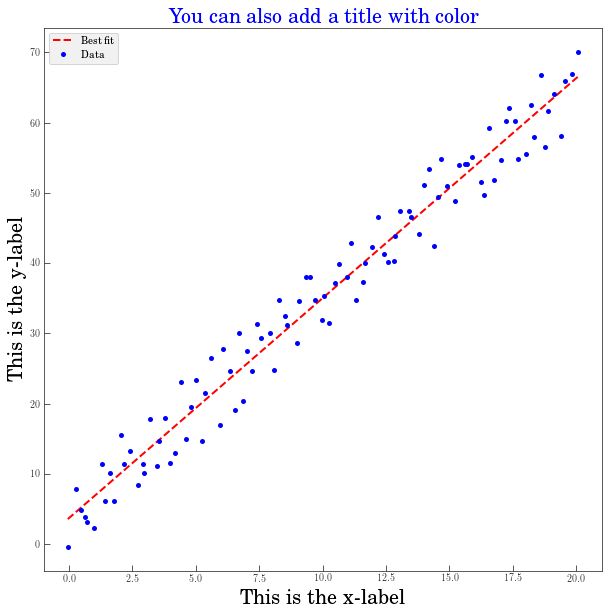

In [92]:
# Initializing figure (optional)
fig = plt.figure(figsize=(10,10), facecolor='white')
ax  = fig.add_subplot(111, facecolor='white')

# Plotting values
plt.plot(x1, myline(x1, *bestfit), 'r--', linewidth=2, label='Best fit')
plt.plot(x1, y1, 'bo', label='Data')

# Setting up limits
plt.xlim((-1, 21)) # Limit the x-range of our plot

# Axis labels
plt.xlabel('This is the x-label', fontsize=20)
plt.ylabel('This is the y-label', fontsize=20)

# Maybe add a title
plt.title('You can also add a title with color',
          fontsize=20,
          color='blue')

# And finally, a legend:
plt.legend(loc='best')

The final script looks like this:

In [ ]:
%load ../scripts/fitting_line.py

## More complicated plots - Histogram

Now let's plot a distribution of values

In [94]:
## Importing modules
import numpy as np
import scipy
import matplotlib.pyplot as plt

Now we need to define the mean and standard deviation of a normal distribution, and create an array of __random__ values:

In [95]:
# Mean and standard deviation
mu, sigma = 100, 15

# Array of random values
x = mu + (sigma * np.random.randn(10000))

# Printing out values of `x`
print(x)

[ 77.35324464 113.82141577 100.03311945 ... 111.53419448 135.45606453
  93.43486279]


We can also define a function for the PDF of the distribution:

In [96]:
# Function for the PDF of distribution
def normpdf(x, mu, sigma):
    """
    PDF of a distribution with a mean and standard deviation
    
    Parameters
    -----------
    x : `np.ndarray`, list
        List/Array of values of the distribution
    
    mu : `float`, `int`
        Mean of the distribution
    
    sigma : `float`, `int`
        Standard deviation of the distribution
    
    Returns
    --------
    y : `np.ndarray` or list
        List/array of the normalized PDF values
    """
    u = (x-mu)/np.abs(sigma)
    y = (1/(np.sqrt(2*np.pi)*np.abs(sigma)))*np.exp(-u*u/2)
    return y

Now we construct a histogram with `plt.hist`:

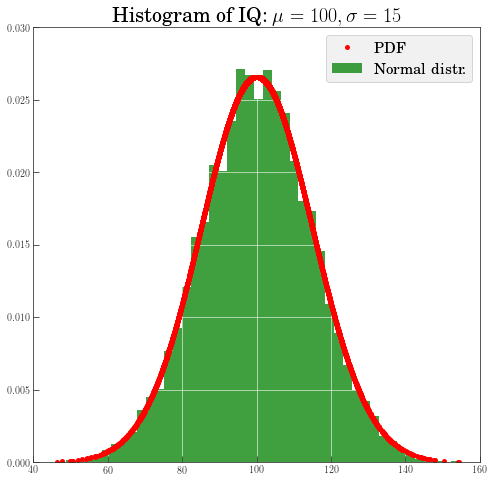

In [97]:
# Initialize figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, facecolor='white')

# Creating histogram
n, bins, patches = plt.hist(x,
                            bins=50,
                            density=True,
                            histtype='stepfilled',
                           facecolor='green',
                           alpha=0.75,
                           label='Normal distr.')

# Normalized PDF
y_pdf = normpdf(x, mu, sigma)
plt.plot(x, y_pdf, 'ro', linestyle='', label='PDF')

# Adding labels and title
plt.title(r'Histogram of IQ: $\mu = %s, \sigma = %s$' %(mu, sigma),
         fontsize=20)

# Setting up axis
plt.axis([40, 160, 0, 0.03])

# Adding a grid
plt.grid(True)

# Adding legend
plt.legend(loc='best', prop={'size': 15})

The final script for this looks like:

In [ ]:
%load ../scripts/histogram_pdf.py

## Planck Spectrum

The next step is to write a script that generates the Planck spectrum (wavelength and intensity at that wavelength for many wavelenghts)

> Create an equation in Python syntax such that for temperature T=300 K, and wavelenth ($\lambda = 1cm$) it finds the intensity of a Planck Spectrum

Planck Spectrum:

$$
I = \frac{2hc^2}{\lambda^5}\frac{1}{e^{hc/(\lambda\ k T)} - 1}
$$

In [99]:
# Write your answer here

### Method 1

This method uses does the following:

- Constructs a dictionary with known values for the constants, i.e. $h, c, k$
- Creates a function to calculate the Planck spectrum, $I$
- Plots the Planck spectrum at every wavelength for a given Temperature $T$

In [100]:
## First import your modules

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

#### Creating a dictionary with constants

In [101]:
## Dictionary of constants
def const_dict_func():
    """
    Dictionary of constants

    Returns
    ---------
    const_dict : `dict`
        Dictionary of constants
    """
    const_dict = {}
    const_dict['c'] = 3.0e8    # Speed of light
    const_dict['h'] = 6.62e-34 # Planck's constant
    const_dict['k'] = 1.38e-23 # Boltzmann's constant

    return const_dict

This will let you call the dictionary and get the _values_ for each of the constants.

Keep in mind that the we had to know the __units__ beforehand. There are other ways to do this, but
we'll discuss them at the end.

#### Function for calculating the Power spectrum for a given wavelength $\lambda$ and at fixed Temperature $T$

In [102]:
def planck_spectrum(T, wavelen):
    """
    Computes the Planck spectrum for a given Temperature and wavelength

    Parameters
    -----------
    T : `float`, `int`
        Temperature used. In units of `Kelvin`

    wavelen : `float`, `int`
        Wavelengths to evaluate

    Returns
    -----------
    I : `np.ndarray`, `float`, `int`
        Intensity of the Power spectrum at given temperature and wavelength
    """
    ## Constants
    # Calling function `const_dict_func` and saving output as a dictionary
    const_dict = const_dict_func()
    # Saving values of constants as new variables
    c = const_dict['c']
    h = const_dict['h']
    k = const_dict['k']
    ## Computing the Planck spectrum or 'radiance'
    # Radiance
    I = (2 * h * c ** 5) / (wavelen**5)
    I *= 1./(-1. + np.exp((h * c)/(wavelen * k * T)))

    return I

#### Function for _plotting_ the data

This function will plot the spectrum for the Planck spectrum as function of wavelength $\alpha$ at fixed Temperature $T$

In [145]:
## Plotting data
def plot_planck(data, T):
    """
    Plots the Planck spectrum

    Parameters
    ------------
    data : `np.ndarray`
        Data containing wavelength and planck spectrum information.
        Shape is (N, 2)
    
    T : `float`, `int`
        Temperature, at which the Planck spectrum is analyzed.
    """
    # Clearing previous figures
    plt.clf()
    plt.close()
    # Initializing figure
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, facecolor='white')
    # Plotting spectrum
    plt.plot(data[:, 0], data[:, 1], marker='o', color='b', linestyle='--',
                label='T={0} K'.format(T))
    #
    # Axis labels
    ax.set_xlabel(r'$\lambda$ [m]', fontsize=20)
    ax.set_ylabel('Intensity', fontsize=20)
    # Legend
    ax.legend(loc='best', prop={'size':20})
    #
    # Showing figure
    plt.show()

#### Writing the _main_ function:

In [146]:
def main():
    """
    Main function
    """
    #
    # Temperature as an input parameter
    T = 300 ## In units Kelvin
    #
    # Wavelenght
    wavelen_min = 1.e-7 # Minimum wavelength in meters
    waveln_max  = 6.e-5 #Maximum wavelength in meters
    samples     = 100 # Number of steps to output
    #
    ### List of wavelengths - Computing the wavelengths 
    # Creating array of number of samples
    wavelen = np.arange(samples)
    # Populating the array of wavelengths
    wavelen = wavelen_min + (waveln_max - wavelen_min) * wavelen / float(samples)
    #
    # Computing the radiance
    radiance = planck_spectrum(T, wavelen)
    #
    # Stacking the data
    data = np.column_stack((wavelen, radiance))
    # Sorting data from smallest to largest wavelength
    data_sort_idx = np.argsort(data[:,0])
    data_sort     = data[data_sort_idx]
    #
    ## Saving data to file
    # Definiing output path and checking if it exists
    output_path = '../datafiles'
    if not (os.path.exists(output_path)):
        os.makedirs(output_path)
    # Saving data to file
    np.savetxt('{0}/spectrum.dat'.format(output_path), data)
    #
    # Plotting data
    plot_planck(data, T)

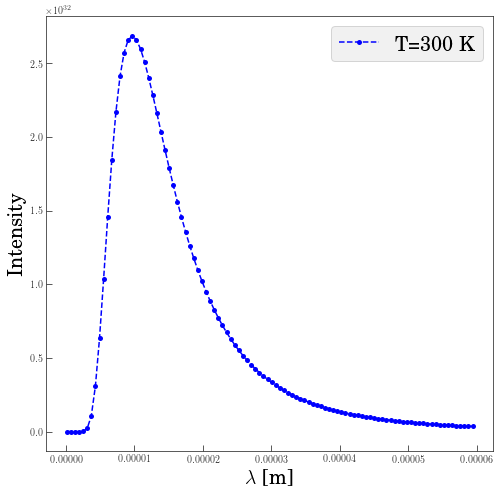

In [147]:
## Calling main function
main()

#### Script

With all of this defined, you can put it in a single script.

This code is found under `../scripts/planck_spectrum.py`

In [ ]:
%load ../scripts/planck_spectrum.py

### Method 2 - Plotting multiple Planck spectrums

Now we can try to the Planck spectrum for multiple temperatures $T$.

We will have to modify the some of the functions to include $T$ as part of an argument.
We'll modify both the `main` and `plot_planck` functions.

#### Modifying the _plotting_ function

We'll modify this function to:

- include $T$ as an input parameter,
- Loop over the different temperature values in `T_arr`
- Choose the color from a colormap

In [136]:
## Importing new modules
from matplotlib.pyplot import cm

## Plotting data
def plot_planck_2(data, T_arr):
    """
    Plots the Planck spectrum

    Parameters
    ------------
    data : `np.ndarray`
        Data containing wavelength and planck spectrum information.
        Shape is ((N, 2), M)
    
    T_arr : `np.ndarray`
        Array of the different temperatures.
        Shape, (M, ), i.e. it has `M` number of elements.
    """
    # Defining the colormap
    color_arr=cm.rainbow(np.linspace(0, 1, len(T_arr)))
    # Clearing previous figures
    plt.clf()
    plt.close()
    # Initializing figure
    fig = plt.figure(figsize=(10,10))
    ax  = fig.add_subplot(111, facecolor='white')
    # Plotting spectrum
    for kk, T_kk in enumerate(T_arr):
        plt.plot(data[kk][:, 0],
                 data[kk][:, 1],
                 marker='o',
                 color=color_arr[kk],
                 linestyle='--',
                 label='{0} K'.format(T_kk))
    #
    # Axis labels
    ax.set_xlabel(r'$\lambda$ [m]', fontsize=20)
    ax.set_ylabel('Intensity', fontsize=20)
    #
    # Legend
    ax.legend(loc='best', prop={'size':14})
    #
    # Showing figure
    plt.show()

#### Modifying the main function to include $T$ as an input parameter

In [137]:
def main_2():
    """
    Main function
    """
    #
    # Temperature as an input parameter
    T_arr = np.arange(300, 1000, 100) ## In units Kelvin
    #
    # Wavelenght
    wavelen_min = 1.e-7 # Minimum wavelength in meters
    waveln_max  = 6.e-5 #Maximum wavelength in meters
    samples     = 100 # Number of steps to output
    #
    ### List of wavelengths - Computing the wavelengths 
    # Creating array of number of samples
    wavelen = np.arange(samples)
    # Populating the array of wavelengths
    wavelen = wavelen_min + (waveln_max - wavelen_min) * wavelen / float(samples)
    #
    ## Computing the radiance
    # Defining array for `data`
    data = [[] for x in range(len(T_arr))]
    for kk in range(len(T_arr)):
        radiance_kk = planck_spectrum(T_arr[kk], wavelen)
        # Stacking the data
        data_kk = np.column_stack((wavelen, radiance_kk))
        # Sorting data from smallest to largest wavelength
        data_kk_sort_idx = np.argsort(data_kk[:,0])
        data_kk_sort     = data_kk[data_kk_sort_idx]
        # Saving to array
        data[kk] = data_kk_sort
    #
    # Plotting data
    plot_planck_2(data, T_arr)

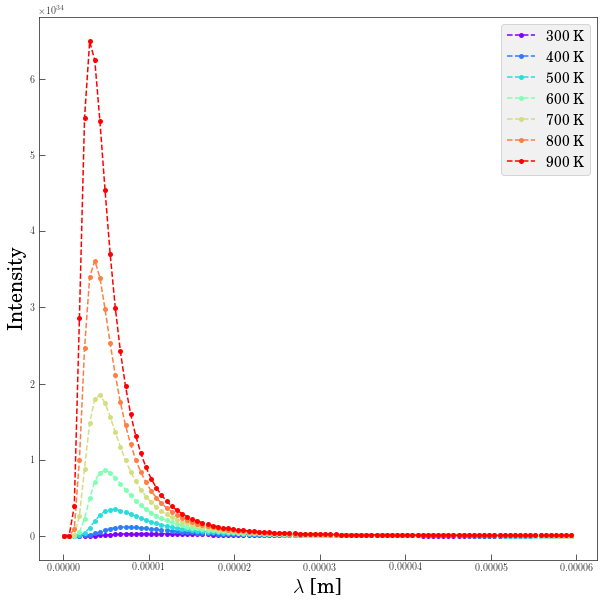

In [138]:
main_2()

Now you see how the Planck spectrum changes as a function of wavelength $\lambda$!
